In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key,g_key
import scipy.stats as sts
from scipy.stats import linregress
import time
import os

In [2]:
lat=np.random.uniform(-90.00,90.00,10000)

In [3]:
lon=np.random.uniform(-180,180.00,10000)

In [4]:
coordinates=list(zip(lat,lon))

In [5]:
cities=set()

In [6]:

for nos in coordinates:
    citi=citipy.nearest_city(nos[0],nos[1])
    city=citi.city_name
    cities.add(city)
    if len(cities)==600:
        break

In [7]:
len(cities)

600

In [8]:
cities=list(cities)

In [9]:
type(cities)

list

In [10]:
cities=pd.DataFrame({'Cities':cities})
cities.head()

,Cities
0,taybad
1,port elizabeth
2,alofi
3,athabasca
4,fort william


In [11]:
cities['Country']=""
cities['Latitude']=0
cities['Longitude']=0
cities['Cloudiness']=0
cities['Date']=""
cities['Humidity']=0
cities['Max_Temp']=0
cities['Wind Speed']=0

In [12]:
cities.head()

,Cities,Country,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,taybad,,0,0,0,,0,0,0
1,port elizabeth,,0,0,0,,0,0,0
2,alofi,,0,0,0,,0,0,0
3,athabasca,,0,0,0,,0,0,0
4,fort william,,0,0,0,,0,0,0


In [13]:
#url='http://api.openweathermap.org/data/2.5/weather?'

In [14]:
# lat=response['coord']['lat']
# lon=response['coord']['lon']
# cloudiness=response['clouds']['all']
# date=response['dt']
# humidity=response['main']['humidity']
# max_temp=response['main']['temp_max']
# wind=response['wind']['speed']


In [15]:
counter=0
record=1
sets=1
print("="*30)
print("Begining Data Retrieval")
print("="*30)
print()

for index,row in cities.iterrows():
    print("Searching record {} of set {}  | {}".format(record,sets,row['Cities']))
    url='http://api.openweathermap.org/data/2.5/weather?'
    q=row['Cities']
    params={'q':q, 'appid': weather_api_key,'units':'Imperial'}
    response=requests.get(url,params=params).json()
    try:
        cities.loc[index,'Country']=response['sys']['country']
        cities.loc[index,'Latitude'] = response['coord']['lat']
        cities.loc[index,'Longitude'] = response['coord']['lon']
        cities.loc[index,'Cloudiness'] = response['clouds']['all']
        cities.loc[index,'Date'] = response['dt']
        cities.loc[index,'Humidity'] = response['main']['humidity']  
        cities.loc[index,'Max_Temp'] = response['main']['temp_max']
        cities.loc[index,'Wind Speed'] = response['wind']['speed']
    except KeyError:
        print("*"*30)
        print("Sorry couldn't find {}".format(row['Cities']))
        print("*"*30)
        
            
    record+=1
    if record ==51:
        print("-"*75)
        print("Counter has reached 50, program will pause for 1 second before resuming")
        print("-"*75)
        record=1
        sets+=1 
        time.sleep(1)

print()
print("="*30)
print("Data Retrieval Complete")
print("="*30)

Begining Data Retrieval

Searching record 1 of set 1  | taybad
Searching record 2 of set 1  | port elizabeth
Searching record 3 of set 1  | alofi
Searching record 4 of set 1  | athabasca
Searching record 5 of set 1  | fort william
Searching record 6 of set 1  | ferrol
Searching record 7 of set 1  | nioki
Searching record 8 of set 1  | vila velha
Searching record 9 of set 1  | jawhar
Searching record 10 of set 1  | klichka
Searching record 11 of set 1  | anori
Searching record 12 of set 1  | malinovoye ozero
Searching record 13 of set 1  | burica
******************************
Sorry couldn't find burica
******************************
Searching record 14 of set 1  | yichang
Searching record 15 of set 1  | lagoa
Searching record 16 of set 1  | mys shmidta
******************************
Sorry couldn't find mys shmidta
******************************
Searching record 17 of set 1  | mehamn
Searching record 18 of set 1  | tumannyy
******************************
Sorry couldn't find tumannyy
***

Counter has reached 50, program will pause for 1 second before resuming
---------------------------------------------------------------------------
Searching record 1 of set 4  | te anau
Searching record 2 of set 4  | barcelos
Searching record 3 of set 4  | ostrovnoy
Searching record 4 of set 4  | taolanaro
******************************
Sorry couldn't find taolanaro
******************************
Searching record 5 of set 4  | saint-francois
Searching record 6 of set 4  | tateyama
Searching record 7 of set 4  | sur
Searching record 8 of set 4  | lata
Searching record 9 of set 4  | tabuan
Searching record 10 of set 4  | ola
Searching record 11 of set 4  | balad
Searching record 12 of set 4  | ryotsu
Searching record 13 of set 4  | ngunguru
Searching record 14 of set 4  | louisbourg
******************************
Sorry couldn't find louisbourg
******************************
Searching record 15 of set 4  | portland
Searching record 16 of set 4  | tura
Searching record 17 of set 4  | port

Searching record 3 of set 7  | batemans bay
Searching record 4 of set 7  | la ciotat
Searching record 5 of set 7  | do gonbadan
Searching record 6 of set 7  | vardo
Searching record 7 of set 7  | atuona
Searching record 8 of set 7  | vredefort
Searching record 9 of set 7  | misratah
Searching record 10 of set 7  | paradwip
******************************
Sorry couldn't find paradwip
******************************
Searching record 11 of set 7  | baloi
Searching record 12 of set 7  | baykit
Searching record 13 of set 7  | funadhoo
Searching record 14 of set 7  | karauzyak
******************************
Sorry couldn't find karauzyak
******************************
Searching record 15 of set 7  | georgetown
Searching record 16 of set 7  | santa maria
Searching record 17 of set 7  | puerto madero
Searching record 18 of set 7  | egvekinot
Searching record 19 of set 7  | shirokiy
Searching record 20 of set 7  | mbandaka
Searching record 21 of set 7  | ler
Searching record 22 of set 7  | ponta d

Searching record 12 of set 10  | iqaluit
Searching record 13 of set 10  | tiznit
Searching record 14 of set 10  | stornoway
Searching record 15 of set 10  | lockhart
Searching record 16 of set 10  | santiago de cuba
Searching record 17 of set 10  | luderitz
Searching record 18 of set 10  | cherskiy
Searching record 19 of set 10  | samarai
Searching record 20 of set 10  | san vicente de canete
Searching record 21 of set 10  | shelburne
Searching record 22 of set 10  | cullman
Searching record 23 of set 10  | trincomalee
Searching record 24 of set 10  | kununurra
Searching record 25 of set 10  | geraldton
Searching record 26 of set 10  | tubinskiy
Searching record 27 of set 10  | shenjiamen
Searching record 28 of set 10  | leninskoye
Searching record 29 of set 10  | waingapu
Searching record 30 of set 10  | mpika
Searching record 31 of set 10  | haapiti
Searching record 32 of set 10  | olafsvik
Searching record 33 of set 10  | kaitangata
Searching record 34 of set 10  | busselton
Searchi

In [16]:
cities.shape

(600, 9)

In [17]:
df_cities=(cities[cities['Latitude']!=0])

In [18]:
df_cities.head()

,Cities,Country,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,taybad,IR,34.74,60.78,0,1600292876,33,63.37,13.13
1,port elizabeth,ZA,-33.92,25.57,3,1600292876,82,57.20,18.34
2,alofi,NU,-19.06,-169.92,75,1600292876,78,75.20,18.34
3,athabasca,CA,54.72,-113.29,2,1600292603,56,59.81,4.72
4,fort william,GB,56.82,-5.11,93,1600292876,83,54.00,3.15


In [19]:
df_cities.shape

(549, 9)

In [20]:
# output_file=os.path.join('cities_df.csv')
# df_cities.to_csv(output_file,index=False,header=True)

In [21]:
#Creating Variables for Scatter Plots
lat=df_cities['Latitude']
humidity=df_cities['Humidity']
cloudiness=df_cities['Cloudiness']
wind_speed=df_cities['Wind Speed']
temp=df_cities['Max_Temp']

### LATITUDE VS TEMPERATURE

(-0.3388632829882345, 3.2273696203870974e-16)

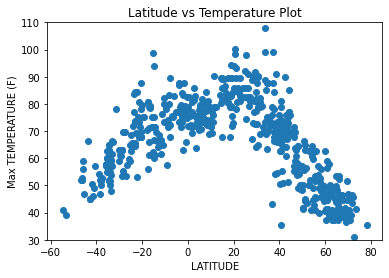

In [22]:
f1=plt.scatter(lat,temp)
plt.ylabel('Max TEMPERATURE (F)')
plt.xlabel('LATITUDE')
plt.ylim(30,110)
plt.title('Latitude vs Temperature Plot')
corr=sts.pearsonr(temp,lat);
corr

#plt.savefig('LatvsTemp')

### We can see that temperature rises as we move towards the equator and goes down as we move away

### LATITUDE VS HUMIDITY

(0.018786942046775636, 0.6604966430749798)

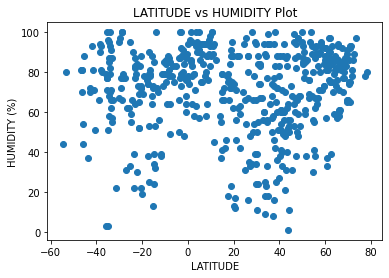

In [23]:
plt.scatter(lat,humidity)
plt.ylabel('HUMIDITY (%)')
plt.xlabel('LATITUDE')
plt.title('LATITUDE vs HUMIDITY Plot')
corr=sts.pearsonr(humidity,lat);
corr
#plt.savefig('LatvsHum')

### Since p-value <<< , results are statistically significant, therfore it is difficult to determine relationship between latitude and humidity

### LATITUDE VS CLOUDINESS

(0.14348196448445794, 0.0007470886284313711)

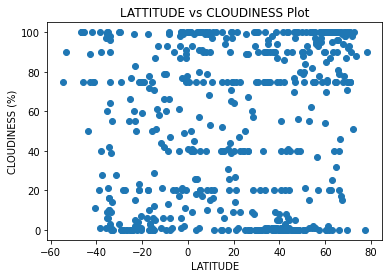

In [24]:
plt.scatter(lat,cloudiness)
plt.ylabel('CLOUDINESS (%)')
plt.xlabel('LATITUDE')
plt.title('LATTITUDE vs CLOUDINESS Plot')
corr=sts.pearsonr(cloudiness,lat);
corr
#plt.savefig('LatvsCloud')

### Cloudiness is evenly spread and symmetrical in patterns in the northen and southern hemisphere

### LATITUDE VS WIND SPEED

(-0.055817151810992505, 0.19159507276787519)

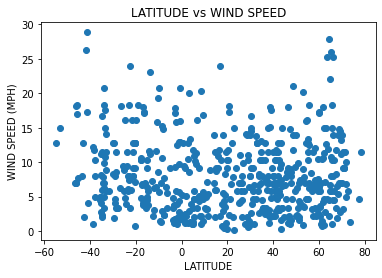

In [25]:
plt.scatter(lat,wind_speed)
plt.xlabel('LATITUDE')
plt.ylabel('WIND SPEED (MPH)')
plt.title('LATITUDE vs WIND SPEED')
corr=sts.pearsonr(wind_speed,lat);
corr
#plt.savefig('LatvsWind')

###  Above code is analyzing wind speed across the northen and southern hemisphere

In [26]:
#Separating NORTHEN AND SOUTHERN HEMISPHERES
df_south=df_cities[df_cities['Latitude'] < 0]
df_north=df_cities[df_cities['Latitude'] >= 0]

In [27]:
#Generating variables for latitdues
lat_s=df_south['Latitude']
lat_n=df_north['Latitude']

In [28]:
#Generating variables for required entities for regression
temp_n=df_north['Max_Temp']
temp_s=df_south['Max_Temp']
hum_n=df_north['Humidity']
hum_s=df_south['Humidity']
cloud_n=df_north['Cloudiness']
cloud_s=df_south['Cloudiness']
wind_n=df_north['Wind Speed']
wind_s=df_south['Wind Speed']

### Regression Analysis

### Latitude (N) vs Max Temp

In [29]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),temp_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.65x + 90.59'

Text(0, 0.5, 'Max Temp (F)')

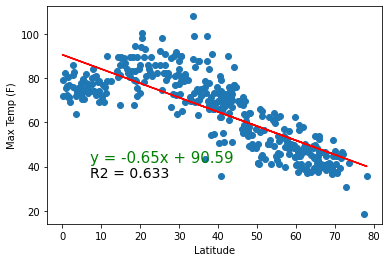

In [30]:
plt.scatter(lat_n,temp_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(7,42),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(7,35),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Temperature drops as we move away from the equator

### Latitude (S) vs Max Temp

In [31]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),temp_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.64x + 81.07'

In [32]:
rvalue

0.7596150034408823

Text(0, 0.5, 'Max Temp (F)')

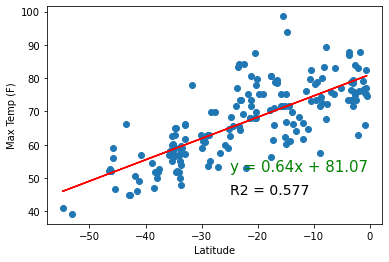

In [33]:
plt.scatter(lat_s,temp_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-25,52),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-25,45),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Temperature rises as we move towards the equator

### Latitude (N) vs Humidity

In [34]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),hum_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.04x + 69.1'

Text(0, 0.5, 'Humidity')

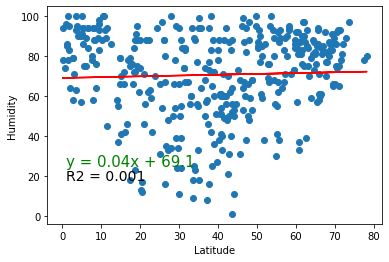

In [35]:
plt.scatter(lat_n,hum_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(1,25),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(1,18),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Humidity very slightly rises or remains constant as we move away from the equator based on line equation

### Latitude (S) vs Humidity

In [36]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),hum_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.1x + 73.23'

Text(0, 0.5, 'Humidity')

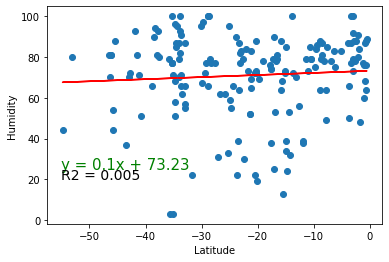

In [37]:
plt.scatter(lat_s,hum_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-55,25),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-55,20),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Humidty reduces based on line equaiton as we move towards equator

### Latitude(N) vs Cloudiness

In [38]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),cloud_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.3x + 42.0'

Text(0, 0.5, 'Cloudiness')

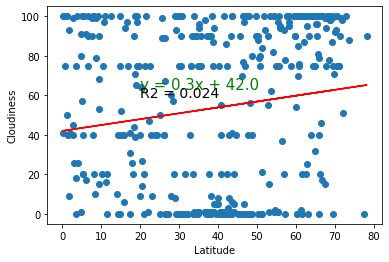

In [39]:
plt.scatter(lat_n,cloud_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(20,63),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(20,59),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Cloudiness more or less remains constant, latitude has very little affect on it in the northen hemisphere

### Latitude (S) vs Cloudiness

In [40]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),cloud_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.08x + 43.36'

Text(0, 0.5, 'Cloudiness')

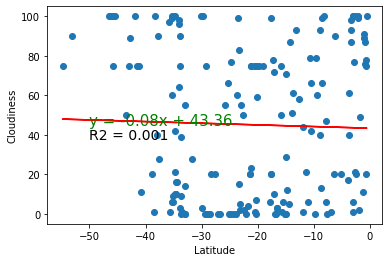

In [41]:
plt.scatter(lat_s,cloud_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,45),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,38),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Cloudiness tends to rise as we move towrards equator from the Southern Hemisphere

### Latitude (N) vs Wind Speed

In [42]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),wind_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.04x + 6.18'

Text(0, 0.5, 'Wind Speed mph')

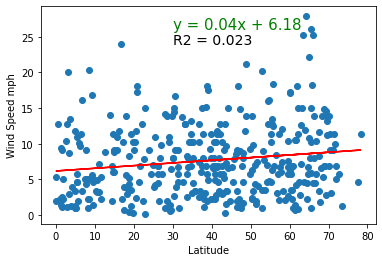

In [43]:
plt.scatter(lat_n,wind_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(30,26),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(30,24),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

### As per the line eq- latitude hardly contributes to the wind speed in the northen hemisphere

### Latitude (S) vs Wind Speed

In [44]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),wind_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.07x + 7.37'

Text(0, 0.5, 'Wind Speed mph')

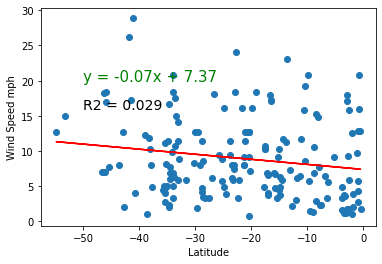

In [45]:
plt.scatter(lat_s,wind_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,20),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,16),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

### Wind speed is greater away from the equator in the southern hemisphere